# Homework 2

### 1. Implement the class `Stacks` and all its methods using singly linked lists. Analyze the runtime and memory complexity, and compare with what we studied in class

In [2]:
class Node:
    """
    Implementation of a node
    """
    def __init__(self, val=None):
        self.val = val
        self.next_node = None
    
    def set_next_node(self, next_node):
        self.next_node = next_node
        
class Singly_linked_list:
    """
    Implementation of a singly linked list
    """
    def __init__(self, head_node=None):
        self.head_node = head_node
        
    def list_traversed(self):
        node = self.head_node
        while node:
            print(node.val)
            node = node.next_node
            
    def insert_head(self, new_node):
        # insert to the head
        # A -> B -> null
        # R -> A -> B -> null 
        new_node.set_next_node(self.head_node)
        self.head_node = new_node
        
    def delete_head(self):
        # delete the         #if self.l == 0:
        #    return True
        #return Falsehead 
        node = self.head_node
        if self.head_node:
            self.head_node = self.head_node.next_node        
        


In [3]:
class Stack(object):
    """
    Implementation of the stack data structure
    """

    def __init__(self, n):
        self.l = 0
        self.n = n
        self.stack = Singly_linked_list()      
    
    def push(self, item):
        """
        Add new item to the stack
        """
        node = Node(item)
        if self.l == self.n:
            raise ValueError("no more capacity")
        self.stack.insert_head(node)
        self.l += 1
    
    def pop(self):
        """
        Remove an element from the stack
        """
        if not self.l:
            raise('stack is empty')
        c = self.stack.head_node.val
        self.stack.delete_head()
        self.l -= 1
        return c
    
    def top(self):
        """
        Show the top element of the stack
        """
        return self.stack.head_node.val
    
    def full(self):
        """
        Is the stack full?
        """
        return self.l == self.n

    def empty(self):
        """
        Is the stack empty?
        """
        return self.l == 0

    def size(self):
        """
        Return size of the stack
        """
        return self.l

In [4]:
S = Stack(10)
S.push(1)
S.push(2)
S.push(4)
S.push(-1)

In [5]:
S.size()

4

In [6]:
S.pop()

-1

In [7]:
S.top()

4

In [8]:
S.size()

3

### Complexity:

The complexities are the same as the ones in the original implementation of the class Stack. In terms of memory, using linked lists increases the memory to twice the one required using arrays because linked list nodes are objects that allocate memory for the value and the next pointer. However, the memory complexity is the same O(n)

### 2. Write a method part of the linked list class that will reverse the linked list. Your implementation should visit each node in the list only one time, and should use $O(1)$ of extra memory.


> For example, if the list is:

> A -> B -> C -> D -> null

> The method must return:

> D -> C -> B -> A -> null



In [44]:
class Singly_linked_list(Singly_linked_list):
    def reverse(self):
        node = self.head_node
        prev = None
        while node:
            next_node = node.next_node
            node.next_node = prev
            prev = node
            node = next_node
        self.head_node = prev
            

In [63]:
m1 = Node("Jan")
m2 = Node("Feb")
m3 = Node("March")

m1.set_next_node(m2)
m2.set_next_node(m3)

list1 = Singly_linked_list(m1)

list1.list_traversed()

Jan
Feb
March


In [64]:
list1.reverse()
list1.list_traversed()

March
Feb
Jan


### 3. Implement the class Queue using stacks. 

> a. Analyze the runtime and memory complexity, and compare with what we implemented in class.

> b. Implement a few test cases that would allow you to measure the difference in runtime of the `dequeue` method. (Hint: what is the worst case, so that dequeue of the stack implementation is greater than the implementation we did in class?)


In [138]:
class Queue_st(object):
    """
    Implementation of the queue data structure
    """

    def __init__(self, n):
        self.l = 0
        self.n = n
        self.queue_in = Stack(self.n)
        self.queue_out = Stack(self.n)
    
    
    def move_queue(self):
        """
        Move elements from in queue to out queue
        """
        while not self.queue_in.empty():
            self.queue_out.push(self.queue_in.pop())
    
    def enqueue(self, item):
        """
        Add new item to the queue
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        self.queue_in.push(item)
        self.l += 1
        
    def dequeue(self):
        """
        Remove an element from the queue
        """
        if self.empty():
            raise ValueError("queue is empty")
        else:
            if self.queue_out.empty():
                self.move_queue()
                
            self.l -= 1
            return self.queue_out.pop()
            
    def first(self):
        """
        Show the first element of the queue
        """
        if self.empty():
            raise ValueError("queue is empty")
        else:
            if self.queue_out.empty():
                self.move_queue()
            return self.queue_out.top()
    
    def full(self):
        """
        Is the queue full?
        """
        return self.l == self.n      

    def empty(self):
        """
        Is the queue empty?
        """
        return self.l == 0

    def size(self):
        """
        Return size of the queue
        """
        return self.l


In [139]:
q = Queue_st(10)
q.enqueue(1)
q.enqueue(2)
q.enqueue(3)

In [140]:
q.dequeue()

1

In [141]:
q.first()

2

In [142]:
q.size()

2

In [143]:
q.enqueue(5)
q.enqueue(6)

In [144]:
q.dequeue()

2

In [145]:
q.dequeue()

3

In [146]:
q.first()

5

In [147]:
q.dequeue()

5

In [148]:
q.dequeue()

6

In [150]:
q.empty()

True

### Complexity:

**Runtime:** All the functions except for the dequeue function have the same complexity as the ones implemented in class. For the case  of dequeue, the complexity is constant most of the time, except when the stack used to output values is empty, in that case elements from the input stack must be moved to the output stack. In general this implementation is more efficient, since the one in class, we had to move elements everytime a element from the queue is removed. In this implementation, we only move them when the output stack is empty.

**Memory:** We need twice the memory since we are using two stacks to emulate one queue.



### Test cases:

The worst case will only happen we move elements every time we input a value. And that happens, when we remove the element immediately after inserting it. 


In [152]:
class Queue(object):
    """
    Implementation of the queue data structure
    """

    def __init__(self, n):
        self.l = 0
        self.n = n
        self.queue = self._create_queue(self.n)        
    
    def _create_queue(self, n):
        """
        Creates a new stack of capacity n
        """
        return (n * ctypes.py_object)()
    def enqueue(self, item):
        """
        Add new item to the queue
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        self.queue[self.l] = item
        self.l += 1
    
    def dequeue(self):
        """
        Remove an element from the queue
        """
        c = self.queue[0]
        for i in range(1,self.l):
            self.queue[i-1] = self.queue[i]
        self.queue[self.l - 1] = ctypes.py_object
        self.l -= 1
        return c

In [157]:
q1 = Queue_st(10)
t1 = time()
for i in range(10000):
    q1.enqueue(i)
    a = q1.dequeue()
total1 = (time() - t1)*10**6
print("Total time stack:", str(total1))

q2 = Queue(10)
t1 = time()
for i in range(10000):
    q2.enqueue(i)
    a = q2.dequeue()
total2 = (time() - t1)*10**6
print("Total time queue:", str(total2))



Total time stack: 62743.425369262695
Total time queue: 13261.079788208008


We can see that the complexity is worst, and that's because this case is the worst for the stack implementation, it requires a transfer from the input to output stack each time. On the other hand, this is the best case for the queue class because there is no movement of elements after each dequeue.

In [159]:
q1 = Queue_st(10000)
t1 = time()
for i in range(10000):
    q1.enqueue(i)
for i in range(10000):    
    a = q1.dequeue()
total1 = (time() - t1)*10**6
print("Total time stack:", str(total1))

q2 = Queue(10000)
t1 = time()
for i in range(10000):
    q2.enqueue(i)
for i in range(10000):
    a = q2.dequeue()
total2 = (time() - t1)*10**6
print("Total time queue:", str(total2))

Total time stack: 53710.9375
Total time queue: 15534422.874450684


Now, in this case we populate the queue with 10,000 elements and after that we start removing one by one. This is the opposite case, the best case scenario for the stack-based queue and the worst for the one implemented in class. The former outperform the first because it takes mostly constant time to do the dequeue, we move elements from the input stack to the output one only one time. 

On the other hand, the queue implemented in class must move elements each time there is a dequeue. The first dequeue 9,999 elements are moved, the second 9,998, and so on. If we add up the operations we can see that the complexity:

$\sum_{i=1}^{n-1} i = \frac{(n-1)n}{2} = O(n^2) $

### 4. Complete the PriorityQueue class, so that when we call `dequeue`, the element with the highest priority will be returned. Analyze the complexity of runtime and memory of the `enqueue` and `dequeue` methods.

#### Hint: use insertion sort , or find the minimum for each dequeue

#unsorted

Q = [(9,2), (1,5), (8,4)]

#sorted - O(n^2)

Q = [(1,5), (8,4), (9,2)]

#insert((2,3)) - O(n^2)

Q = [(1,5), (2,3), (8,4), (9,2)]




In [16]:
Q = [(9,2), (1,5), (8,4)]

insertion_sort(Q)


[(1, 5), (8, 4), (9, 2)]

In [43]:
import ctypes


class PriorityQueue(object):
    """
    Implementation of the queue data structure
    """

    def __init__(self, n):
        self.l = 0
        self.n = n
        self.queue = self._create_queue(self.n)        
    
    def _create_queue(self, n):
        """
        Creates a new stack of capacity n
        """
        return (n * ctypes.py_object)()
    
    def enqueue(self, item):
        """
        Add new item to the queue
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        
        self.queue[self.l] = item
        self.l += 1
        j = self.l - 2
        while (j >= 0) and (item[0] > self.queue[j][0]):
            self.queue[j+1] = self.queue[j]
            j -= 1
        self.queue[j+1] = item    
        
    def dequeue(self):
        """
        Remove item with lowest key
        """
        x = self.queue[self.l-1]
        self.l -= 1
        return x[1]
    

In [39]:
q = PriorityQueue(10)
q.enqueue((9,2))
q.enqueue((1,5))
q.enqueue((8,4))
q.enqueue((10,3))
q.enqueue((2,7))
q.enqueue((0,1))

(8, 4)
(10, 3)
(10, 3)
(10, 3)
(2, 7)


In [40]:
for i in range(q.l):
    print(q.queue[i])

(10, 3)
(9, 2)
(8, 4)
(2, 7)
(1, 5)
(0, 1)


In [41]:
q.dequeue()

1

In [42]:
for i in range(q.l):
    print(q.queue[i])

(10, 3)
(9, 2)
(8, 4)
(2, 7)
(1, 5)


### Complexity:

enqueue: takes O(n) since the modified version of insertion sort needs to go through the whole queue  (in the worst case) to place the new item in the right place based in priority

dequeue: takes O(1) since the item in the (self.l - 1) location in the queue is always removed. 

### 5. A given linked-list (singly or doubly) represents an integer number. For example, 345 is represented by the singly-linked list 3 -> 4 ->5. Write a Python program that does the following:

1. Receives three integers A, B and C as inputs. Assume that the three number have the same number of digits.

2. Transform the numbers to their corresponding linked lists

3. Implement the sum of the three numbers. The result A + B + C must be stored in a linked list. 

4. Print the result by traversing the list. 

5. Run your program for numbers with 1 to 100 digits, and capture the runtime. Use these number to estimate the complexity of the runtime.
    - Hint: write a small function that uses `randint()` to generate a number of a given number of digits 
6. Analitically estimate the runtime complexity and compare with the one obtained in (5).

In [ ]:
3->4->5
1->2->3
5->6->7
---------
1->0->3->5

In [4]:
import random
len(str(random.randint(10**49, 10**50)))

50

In [116]:
from time import time
  
def timer_func(func):
    # This function shows the execution time of 
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time()
        result = func(*args, **kwargs)
        total = (time() - t1)*10**6
        return total, result
    return wrap_func

@timer_func
def addThreeNumbers(l1, l2, l3):

    carry = 0
    total = 0
    prev = None
    res = Singly_linked_list()
    
    # We first need to reverse the numbers
    
    l1.reverse()
    l2.reverse()
    l3.reverse()
    
    n1 = l1.head_node
    n2 = l2.head_node
    n3 = l3.head_node

    while n1:

        total = n1.val + n2.val + n3.val
        n1, n2, n3 = n1.next_node, n2.next_node, n3.next_node
        
        total += carry
        if total >= 20:
            carry = 2
            total -= 20
        elif total >= 10:
            carry = 1
            total -= 10
        else:
            carry = 0
        
        res.insert_head(Node(total))
    
    if carry > 0:
        res.insert_head(Node(carry))
        
    l1.reverse()
    l2.reverse()
    l3.reverse()

    return res

In [89]:
def int_to_list(n):
    
    res = Singly_linked_list()
    while n > 0:
        n1 = n % 10
        node = Node(n1)
        res.insert_head(node)
        n = n//10
    return res

In [119]:
l1 = int_to_list(345)
l2 = int_to_list(123)
l3 = int_to_list(567)

In [120]:
us, total = addThreeNumbers(l1, l2, l3)
total.list_traversed()

1
0
3
5


In [121]:
print(us)

76.2939453125


In [122]:
import random
def int_len(n):
    return random.randint(10**(n-1), 10**n)


In [131]:
total_time = list()
for i in range(1,101):
    
    l1 = int_to_list(int_len(i))
    l2 = int_to_list(int_len(i))
    l3 = int_to_list(int_len(i))
    
    us, _ = addThreeNumbers(l1,l2,l3)
    total_time.append(us)

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame()
df['time'] = total_time

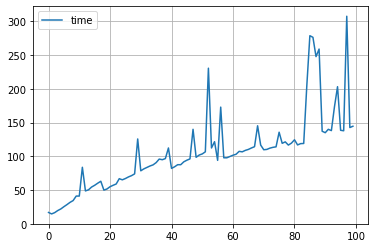

In [137]:
df.plot()
plt.grid()

### Complexity

From the plot we can see that the complexity follows a linear growth

Also, to transform an integer into a list, we need to do $n$ operations, 1 for each digit we add to the list. Additionally, when we do the sum, we visit each digit once for each number to add them up. Adding the complexity of applying reverse, everything is kept in the $O(n)$ complexity.